In [31]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df_numeric = df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [17]:
df_numeric.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


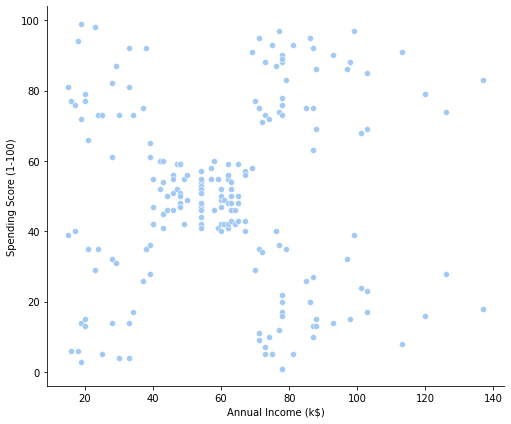

In [112]:
sns.relplot(x='Annual Income (k$)',
            y='Spending Score (1-100)',
            data=df_numeric,
            palette='ch:r=-0.5, l=0.75',
            height=6,
            aspect=1.2)

In [18]:
df_numeric.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
df_numeric.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no null value.

In [20]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()
df_numeric_norm = sc.fit_transform(df_numeric)

In [22]:
type(df_numeric_norm)

numpy.ndarray

In [23]:
numOfK = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in numOfK]

In [25]:
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19)]

In [26]:
score = [kmeans[i].fit(df_numeric_norm).score(df_numeric_norm) for i in range(len(kmeans))]

In [27]:
score

[-799.9999999999999,
 -515.6688891233371,
 -375.2643070614756,
 -259.70593649954003,
 -209.5783837699584,
 -160.9756756881988,
 -144.79331449022817,
 -130.76153255351784,
 -117.80605869711025,
 -103.43536496505251,
 -92.43706114015615,
 -85.55834812071426,
 -77.72903329478683,
 -72.54546178464963,
 -71.06739515866295,
 -66.04197746157787,
 -63.614387070493976,
 -61.1991541310482,
 -58.04806008529592]

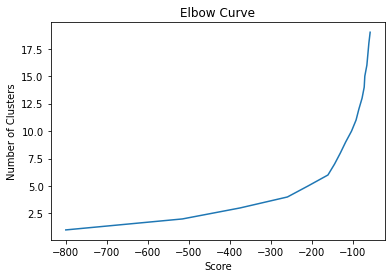

In [30]:
plt.plot(score, numOfK)
plt.xlabel('Score')
plt.ylabel('Number of Clusters')
plt.title('Elbow Curve')
plt.show()

**From the Elbow Curve we can see that, `K=4` will be better for this dataset**

In [32]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_numeric_norm)

KMeans(n_clusters=4)

In [33]:
kmeans.labels_,len(kmeans.labels_)

(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2,
        3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
        3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
        3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
        3, 2], dtype=int32), 200)

In [34]:
df_numeric['cluster'] = kmeans.labels_

In [35]:
df_numeric

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,2
196,197,45,126,28,3
197,198,32,126,74,2
198,199,32,137,18,3


In [36]:
df_numeric['cluster'].count()

200

In [37]:
df_numeric.groupby(['cluster']).count()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,59,59,59,59
1,60,60,60,60
2,41,41,41,41
3,40,40,40,40


# Our Model building is finished
> now lets quickly do a Post Anlysis of indivisual Cluster Group

### **Lets look our clustering Group in scatter plot**

  > Clusters of Customers Based on their **Income** and **Spending**

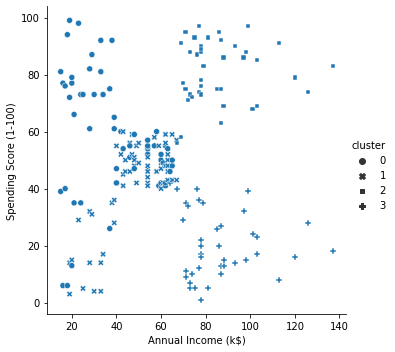

In [47]:
# Clusters of Customers Based on their Income and Spending

sns.relplot(x='Annual Income (k$)',
            y='Spending Score (1-100)',
            data=df_numeric,
            style='cluster');

 - we can do subplots for every clusters for better understanding 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


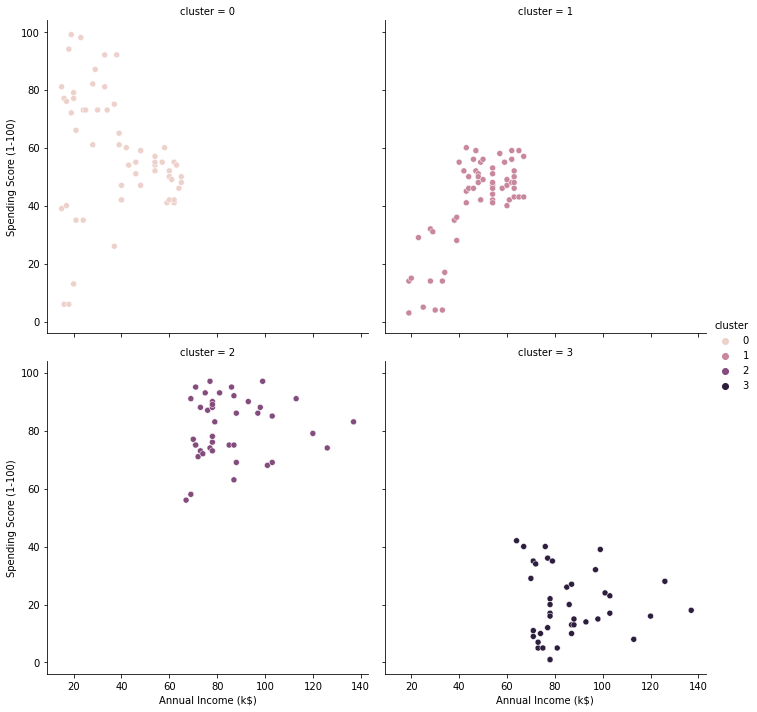

In [54]:
sns.relplot('Annual Income (k$)', 
            'Spending Score (1-100)', 
            hue='cluster',
            data=df_numeric, 
            kind='scatter', 
            col='cluster', 
            col_wrap=2);

- Again, Subplots of clusters Based on their **Ages and Spending**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


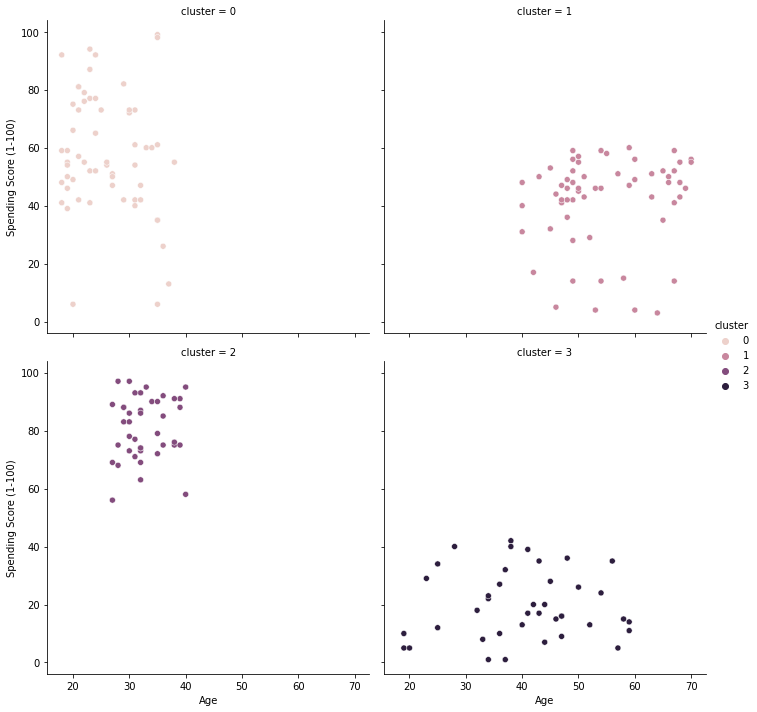

In [55]:
sns.relplot('Age', 
            'Spending Score (1-100)', 
            hue='cluster',
            data=df_numeric, 
            kind='scatter', 
            col='cluster', 
            col_wrap=2);

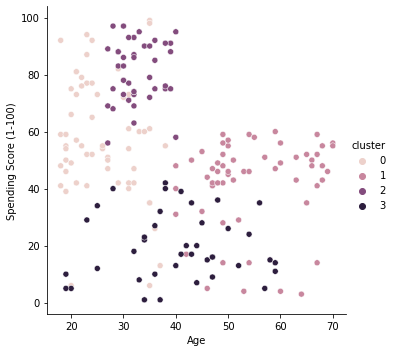

In [57]:
sns.relplot(x='Age',
            y='Spending Score (1-100)',
            data=df_numeric,
            hue='cluster');

### From this visualization we can see that
    - Customeres age of 25-40 years are more likely to spending 
    - Cluster num 2 has better income and spending ratio than others 

In [104]:
# lets find out average of income and spending of indivisual Cluster

income_avg = []
spending_avg = []

for i in range(4):
  income_avg.append(df_numeric[df_numeric['cluster'] == i]['Annual Income (k$)'].mean())
  spending_avg.append(df_numeric[df_numeric['cluster'] == i]['Spending Score (1-100)'].mean())


In [106]:
cluster_analysis_dic = {
    'Cluster': [0, 1, 2, 3],
    'Annual Income(avg)': income_avg,
    'Spending Score(avg)': spending_avg
}

In [107]:
cluster_analysis_df = pd.DataFrame(cluster_analysis_dic)

In [108]:
cluster_analysis_df

,Cluster,Annual Income(avg),Spending Score(avg)
0,0,38.779661,58.067797
1,1,47.933333,41.783333
2,2,85.634146,80.902439
3,3,85.925000,19.750000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


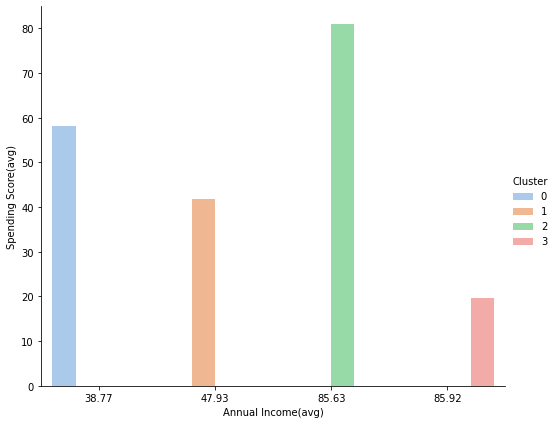

In [96]:
sns.set_palette('pastel')
sns.catplot('Annual Income(avg)', 
            'Spending Score(avg)', 
            data=cluster_analysis_df, 
            kind='bar', 
            hue='Cluster',
            height=6,
            aspect=1.2)

- After visualization i say that Cluster number 2 has better income and spending ratio.
- Now, we can mathematically see that by plotting a Bar Graph.